## 2.1



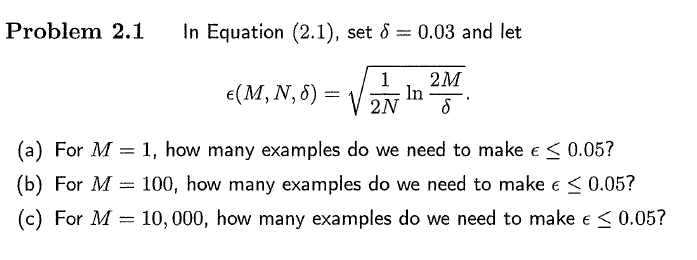

Sea $\delta=0.003$ y sea:
$$\varepsilon(M,N,\delta)=\sqrt{\frac{1}{2N}ln\left(\frac{2M}{\delta}\right)}$$
Si se desea que:
$$\varepsilon(M,N,\delta)\leq 0.005$$

Despejando la ecuación para la variable N:

$$\begin{align*} 
\frac{1}{2N}ln\left(\frac{2M}{\delta}\right)&\leq (0.005)^{2} \\
\frac{1}{2(0.005)^{2}}ln\left(\frac{2M}{\delta}\right)&\leq N \\ 
\end{align*}$$

Reemplazando tenemos:



In [ ]:
import numpy as np
def N(k,d,M):

  return (1/k**2)*np.log((2*M)/d)
for i in [1,100,10000]:
  print(f'El número de ejemplos mínimos necesarios para M={i} es {np.floor(N(k=0.05,d=0.03,M=i))+1}') 

El número de ejemplos mínimos necesarios para M=1 es 1680.0
El número de ejemplos mínimos necesarios para M=100 es 3522.0
El número de ejemplos mínimos necesarios para M=10000 es 5365.0


## 2.2

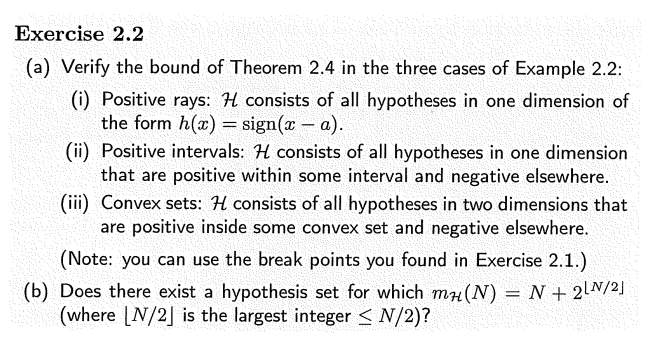

Teorema 2.4:

Si $m_H(k)<2^k$ entonces
$$m_H(N)\leq \sum_{i=0}^{k-1}{\binom{N}{i}}$$

Para todo $N$. El RHS es polinomial en $N$ de grado $k-1$

a.

i.) Para el primer item se tiene que $m_h(N)=N+1$, entonces si $k=2$ entonces
 $$\begin{align*}
  RHS=& \sum_{i=0}^{2-1}{\binom{N}{i}}\\
  =& N+1
 \end{align*}$$
 Eso quiere decir que para $k\geq 2$ entonces 
 $$N+1\leq \sum_{i=0}^{k-1}{\binom{N}{i}}$$

ii.) En el segundo caso si se tiene que $m_h(N)=\binom{N+1}{2}+1$, entonces si $k=3$ 

$$\begin{align*}
  RHS=& \sum_{i=0}^{3-1}{\binom{N}{i}}\\
  =& \binom{N}{0}+\binom{N}{1}+\binom{N}{2}\\
  =& 1+\frac{N}{2}+\frac{N^2}{2}\\
  =& \binom{N+1}{2}+1
 \end{align*}$$

Así qué para $k\geq 3$ se tiene que $m_H(N)\leq \sum_{i=0}^{k-1}\binom{N}{i}$


iii.) Dado que la dimensión es infinita, no existe $k$ como punto de break point, entonces para $k=N+1$ se tiene que $\sum_{i=0}^N\binom{N}{i}=2^N$ y también se tiene que $m_H(N)\leq \sum_{i=0}^N\binom{N}{i}$

b. Para el caso de $m_H(k)=N+2^{[N/2]}$, el punto de quiebre es $k=3$ porque
 $$\begin{align*}
  m_H(3)&=3+2^{[3/2]}\\
  &=5\\
  &<2^3
 \end{align*}$$ 

Teniendo en cudenta el teorema 2.4, se tiene que para todo $N$ 

$$\begin{align*}
  m_H(3)&=\sum_{i=0}^{3-1}\\
  &=5\\
  &<2^3
 \end{align*}$$ 

## 2.5

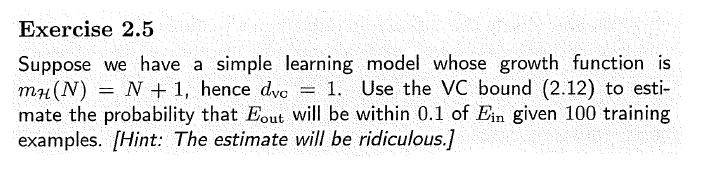

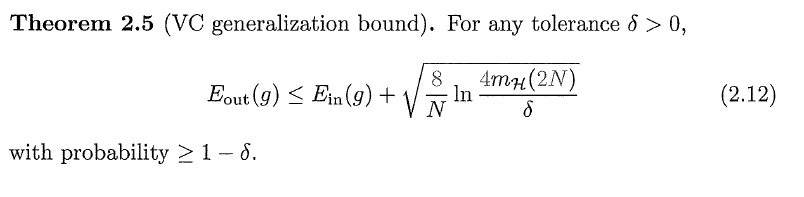

De la ecuación 2.12 podemos afirmar que:
$$E_{out}(g)-E_{in}(g) \leq  \sqrt{\frac{8}{N}\ln{\frac{4m_H(2N)}{\delta}}}$$

Como queremos que $E_{out}(g)$ esté en un radio de $0.1$ alrededor de $E_{in}(g)$ dadas $N=100$ ejemplos de muestra podemos acotar esa distancia como sigue:
$$ $$

$$\begin{align*} 
\sqrt{\frac{8}{N}\ln{\frac{4m_H(2N)}{\delta}}}\leq 0.1\\
 \frac{8}{N}\ln{\frac{4m_H(2N)}{\delta}} \leq (0.1)^2\\ 
\ln{\frac{4m_H(2N)}{\delta}} \leq \frac{N}{8}(0.1)^2\\ 
\ln{\frac{4m_H(2N)}{\delta}} \leq \frac{N}{8}(0.1)^2\\ 
\frac{4m_H(2N)}{\delta} \leq \exp(\frac{N}{8}(0.1)^2)\\
\frac{4m_H(2N)}{\exp(\frac{N}{8}(0.1)^2)} \leq \delta\\
\end{align*}$$

De este modo si calculamos esta cota inferior obtenemos:

In [ ]:
N = 100
dist = 0.1
mh= 2*N + 1
delta=(4*mh)/(np.exp((N * dist**2) /8))
probabilidad= 1-delta 
delta, probabilidad

(709.5275096780147, -708.5275096780147)

Lo cual no es posible.

## 2.6

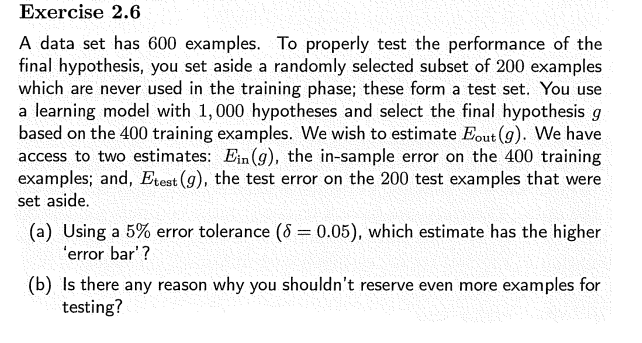


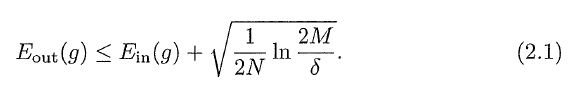

In [ ]:
def errorbar(N,M,D):
  return np.sqrt((1/(2*N))*np.log((2*M)/D))


Cuando tenemos $M=1000$ hipótesis sobre $N=400$ ejemplos de entrenamiento la c
cota de error es:

In [ ]:
errorbar(N=400,M=100,D=0.05)

0.10182122593117574

Ahora bien luego de seleccionar la hipótesis $g$ (con lo cúal $M=1$) y verificamos la cota de error en el conjunto de entrenamiento $N=200$ tenemos:


In [ ]:
errorbar(N=200,M=1,D=0.05)

0.09603227913199208

Con esto es fácil notar que donde se produce mayor cota de error es en el  entrenamiento dado que no hemos seleccionado la mejor aproximación a nuestra función objetivo.

Con respecto al punto b) si se escogen demasiados ejemplos de entrenamiento se tiene el riesgo a sobreajustar el modelo y que este pierda su capacidad de generalizar-"Memoriza" el patrón que tengan el conjunto-. A su vez, si se escogen pocos ejemplos de entrenamiento es posible que se pierda la capacidad de aprender con la hipótesis que se selecciona. Aunque empiricamente hemos determinado que es necesario una proporción mayor de elementos de entrenamiento que de testeo en nuestra opinión no hay criterio matemático que establezca el valor de la misma.

#2.12 
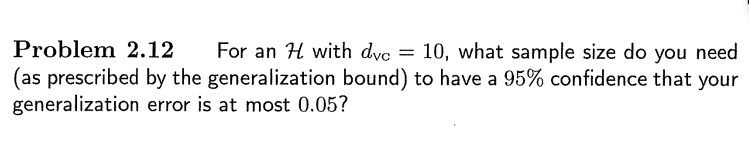

In [ ]:
#### Problem 2.12
dvc = 10
delta = 0.05
epsilon = 0.05

def sample_size(N0, d, delta, epsilon, maxit=1000, tol = 10):
    tol=d
    N = N0
    for it in range(maxit):
        rhs = 8 * np.log(4*((2*N)**d+1)/delta)/epsilon**2
        res = N - rhs
        #print('rhs: ', rhs, 'N: ', N)
        if np.abs(res) <= tol:
            break
        N = int(rhs)
    return N

N0 = 1000
print(f'Tamaño de la muestra: {sample_size(N0, dvc, delta, epsilon)}')

Tamaño de la muestra: 452950


#2.16

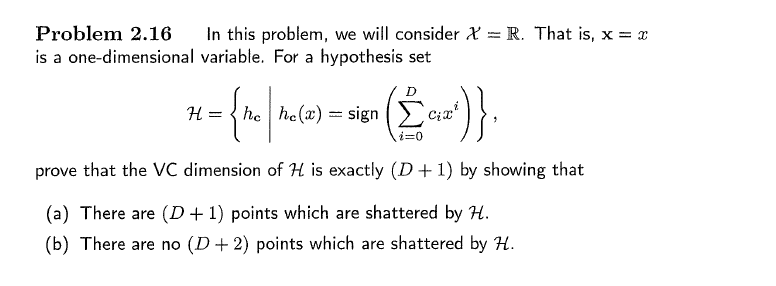

$ \rightarrow$ Como se puede ver en este  [artículo](http://esfm.egormaximenko.com/linalg/det_Vandermonde_es.pdf). Dado un conjunto de $D+1$ pares ordenados de puntos diferentes por pares en un campo $F$    (que en nuestro caso es el conjunto de los Reales)  es posible encontrar un polinomio sobre ese mismo campo que contiene en su curva a tales puntos. Además este polinomio es único.

Pero ¿cómo funciona?. R/ Usando una matriz conocida como la matriz de Vandermonde $(X_{D+1}:=X)$; una matriz no singular cuyas filas son creada a partir de la progresiones geométricas de los $D+1$ puntos. El elemento $ij$-ésimo de esta matriz es $x_i^{j-1}$-. Con esto, nuestro problema de encontrar una hipótesis adecuada (no necesariamente es única por la función signo), esto es, encontrar un polinomio de grado $D$ que rompa los datos  se reduce a solucionar el sistema matricial 
$$Xc=Y$$
$$c=X^{-1}Y$$


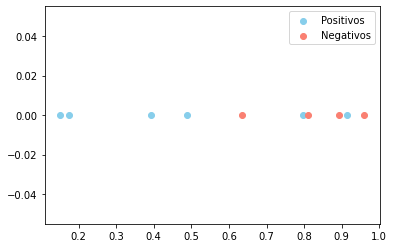

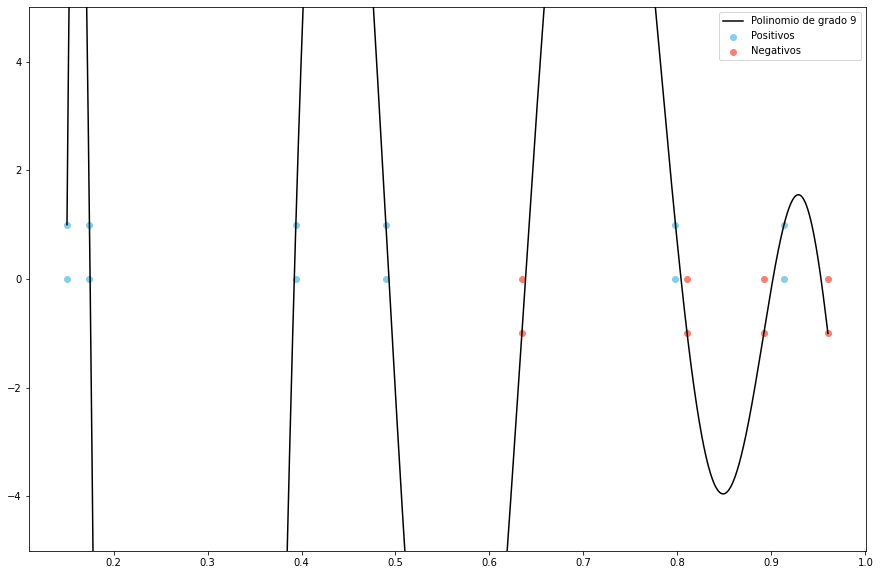

In [ ]:
import matplotlib.pyplot as plt
D1=11
D=D1-1
X=np.random.randint(-10,10)*(np.random.rand(D,))
#X=np.append(X,values=[0])
Etiquetas=[-1,1]
Y=np.random.choice(Etiquetas,size=(D,))
c=np.zeros(shape=(D,))
MatrizV=np.vander(X)
X,Y,c
plt.scatter(X[Y==1],np.zeros(shape=len(X[Y==1])),c='skyblue',label="Positivos")
plt.scatter(X[Y==-1],np.zeros(shape=len(X[Y==-1])),c='salmon',label="Negativos")
plt.legend()
plt.show()


#### Encontrando los coeficientes del polinomio
c=np.linalg.inv(MatrizV)@Y

def polinomio(c,X,D):
  Salida=[]
  for x in X:
    v=np.vander(np.ones(shape=(D,))*x)[0]
    p=c@v
    Salida.append(p)
  Salida=np.array(Salida)
  return Salida

X1=np.linspace(min(X),max(X),10000)
Y1=polinomio(c,X1,D)
plt.figure(figsize=(15,10))
plt.plot(X1,Y1,"k-", label=f"Polinomio de grado {D-1}")
plt.scatter(X[Y==1],np.ones(shape=len(X[Y==1])),c='skyblue',label="Positivos")
plt.scatter(X[Y==-1],-np.ones(shape=len(X[Y==-1])),c='salmon',label="Negativos")
plt.scatter(X[Y==1],np.zeros(shape=len(X[Y==1])),c='skyblue')
plt.scatter(X[Y==-1],np.zeros(shape=len(X[Y==-1])),c='salmon')
plt.ylim(bottom=-5,top=5)
plt.legend()
plt.show()

Nótese que lo que se busca no es que los puntos sean las raíces del polinomio, sino que el valor del polinomio evaluado en los puntos sea 1 si estos son positivos y -1 si estos son negativos. 

In [ ]:
print(np.sign(polinomio(c,X,D)))
print(Y)
X

[-1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[-1  1  1  1  1  1  1  1  1  1]


array([-7.98109803e+00, -8.68355377e-01, -7.11417284e-03, -5.37001705e+00,
       -1.84170134e+00, -4.28455474e-01, -4.56998598e+00, -1.98274613e+00,
       -3.91253348e+00, -6.21502690e+00])

Dado que el polinomio que cumple esta característica en  específico es único y el número de dicotomias es $2^{D+1}$ tenemos que $m_H(D+1)=2^{D+1}$ y $d_{VC}\geq D+1$

________________________________________
$\leftarrow$ Encontrando el breakpoint.(Usando el mismo argumento que el visto en [clase](https://youtu.be/MeeSzoA6TrM?t=2288)).

Sean $\left[x_i\right]_{i=0}^{D+1}$, $D+2$ puntos. Como tal, la matriz de Vandermorde de este conjunto de datos ajustada a $D+1$ columnas es una matriz no cuadrada de tamaño $(D+2)\times(D+1)$ y por tanto no es un conjunto linealmente independiente.

De esta manera, existe un $x_l$ con $0\leq l \leq D+2$ que cumple:

$$[1,x_l,x_l^2,x_l^3,\cdots x_{l}^{D}]=\displaystyle{\sum_{k\neq l}a_k[1,x_k,x_k^2,x_k^3,\cdots x_{k}^{D}]}$$

Ahora bien por el primer elemento de cada vector, es claro que no todos los coeficientes $a_k$ son nulos. Con esto en mente, crearemos una dicotomia en la cual $y_k=sign(a_k)$ para $a_k\neq 0$, $y_l=-1$ y para los demás $y_k=(-1)^k$-Esto es tan sólo una forma de darle una clasificación a todos los puntos. No es la única-.


Ahora bíen para cualquier vector de constantes $c=[c_0,c_1,\cdots,c_D]$ tenemos  que:


$$\begin{align*}
[1,x_l,x_l^2,x_l^3,\cdots x_{l}^{D}] \cdot\ [c_0,c_1,\cdots c_D]^{T}&=\displaystyle{\sum_{k\neq l} a_k[1,x_k,x_k^2,x_k^3,\cdots x_{k}^{D}]\cdot\ [c_0,c_1,\cdots c_D]^{T} }\\
&=\displaystyle{ \sum_{k\neq l}a_k \sum_{i=0}^{D}c_i\cdot x^i_{k} }\\
&=\displaystyle{ \sum_{k\neq l} \sum_{i=0}^{D} a_k \cdot c_i \cdot x^i_{k} }
 \end{align*}$$


Por otro lado, supongamos que es posible encontrar una hipótesis $h_c \in H $ que rompa los $D+2$ datos, estos es:

$$\begin{align*}
y_k=h_c(x_k)&=sign\left(\sum_{i=0}^{D}c_i x^i_{k}\right)\\
y_l=h_c(x_l)&=sign\left(\sum_{i=0}^{D}c_i x^i_{l}\right)\\
 \end{align*}$$

Con esto, para $a_k\neq 0$:
$$sign(a_k)=sign\left(\sum_{i=0}^{D}c_i x^i_{k}\right)$$
Con lo cual:
 
$$\sum_{i=0}^{D}a_k\cdot c_i\cdot x^i_{k}>0$$


Además, con lo obtenido previamente vemos que:
 
$$0<\sum_{k\neq l}\sum_{i=0}^{D}a_k\cdot c_i\cdot x^i_{k}=[1,x_l,x_l^2,x_l^3,\cdots x_{l}^{D}] \cdot\ [c_0,c_1,\cdots c_D]^{T}$$
Precisamente por ser suma de elementos no nulos, pero:
 
$$[1,x_l,x_l^2,x_l^3,\cdots x_{l}^{D}] \cdot\ [c_0,c_1,\cdots c_D]^{T}=\sum_{i=0}^{D}c_i\cdot x^i_{l}$$
De esta forma concluimos que $-1=y_l=h_c(x_l)=sign\left(\displaystyle{\sum_{i=0}^{D} c_i\cdot x^i_{l}}\right)=1 $

Lo cual es una evidente contradicción.

_________________________________

Finalizando de esta manera la demostración ya que un breakpoint con $D+2$ puntos nos muestra que $d_{VC}<D+2$ y como antes teniamos que $d_{VC}\geq D+1$ tenemos como resultado que $d_{VC}=D+1$.